<a href="https://colab.research.google.com/github/GummyBear-w/aop113b/blob/main/EX03_05_%E5%8F%B0%E7%81%A3%E8%82%A1%E7%A5%A8%E5%B8%82%E5%A0%B4%E5%80%8B%E8%82%A1%E6%AF%8F%E6%97%A5%E6%88%90%E4%BA%A4%E8%B3%87%E8%A8%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2025-04-27 14:37:11--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.203.113, 172.217.203.102, 172.217.203.100, ...
Connecting to drive.google.com (drive.google.com)|172.217.203.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-04-27 14:37:11--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.203.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘taipei_sans_tc_beta.ttf’

taipei_sans_tc_beta 100%[===================>]  19.70M  57.1MB/s    in 0.3s    

2025-04-27 14:37

In [4]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')

plt.rcParams['font.sans-serif'] = 'Taipei Sans TC Beta'
plt.rcParams["axes.unicode_minus"] = False

In [6]:
import pandas as pd

def get_stock_data(date, stock_no):
    url = f'https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date={date}&stockNo={stock_no}&response=html'
    df = pd.read_html(url, header=1)[0]
    return df

'''
date_list = []
for i in range(3, 16):
    year = 2024 + (i//12)
    mnth = i % 12 + 1
    date _list.append(f'{year}{mnth:02}01')
'''

date_range = pd.date_range(start='20240401', end='20250401', freq='MS')
date_list = date_range.strftime('%Y%m%d').tolist()

df = pd.DataFrame()
for date in date_list:
    df = pd.concat([df, get_stock_data(date, '2330')], ignore_index=True)

df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,113/04/01,22348250,17301753062,783.0,783.0,769.0,770.0,-9.0,28192
1,113/04/02,42219075,33230356267,784.0,790.0,783.0,790.0,20.0,41138
2,113/04/03,32909892,25719094412,783.0,785.0,778.0,780.0,-10.0,36003
3,113/04/08,40567580,31925988285,789.0,792.0,783.0,783.0,3.0,29304
4,113/04/09,61642573,49946542596,795.0,820.0,792.0,819.0,36.0,89138
...,...,...,...,...,...,...,...,...,...
253,114/04/21,20672773,17304529560,844.0,847.0,832.0,835.0,-15.0,104189
254,114/04/22,32057642,26346742317,826.0,829.0,816.0,816.0,-19.0,133084
255,114/04/23,40685613,34980602995,853.0,873.0,848.0,873.0,57.0,78430
256,114/04/24,34499991,30099254355,886.0,886.0,859.0,864.0,-9.0,60744


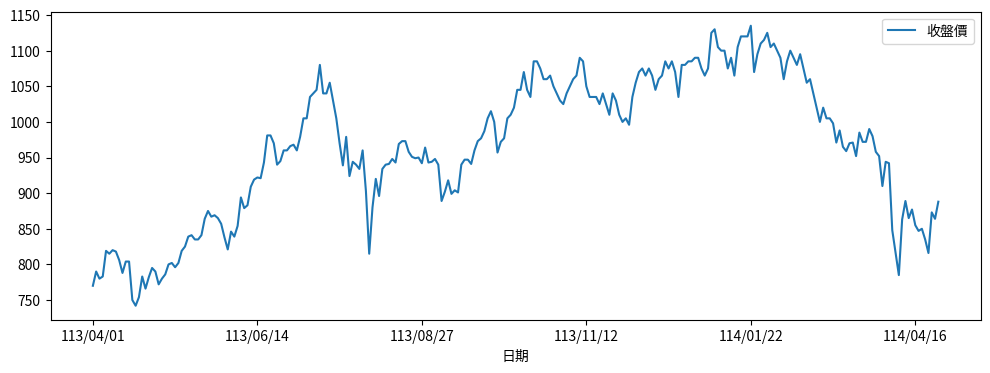

In [7]:
df.plot(kind='line', x='日期', y='收盤價', figsize=(12, 4))
plt.show()

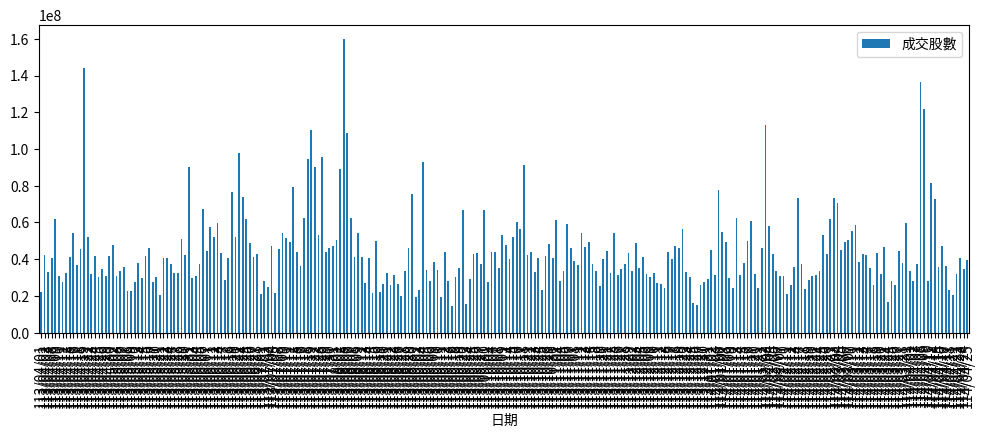

In [8]:
df.plot(kind='bar', x='日期', y='成交股數', figsize=(12,4))
plt.show()

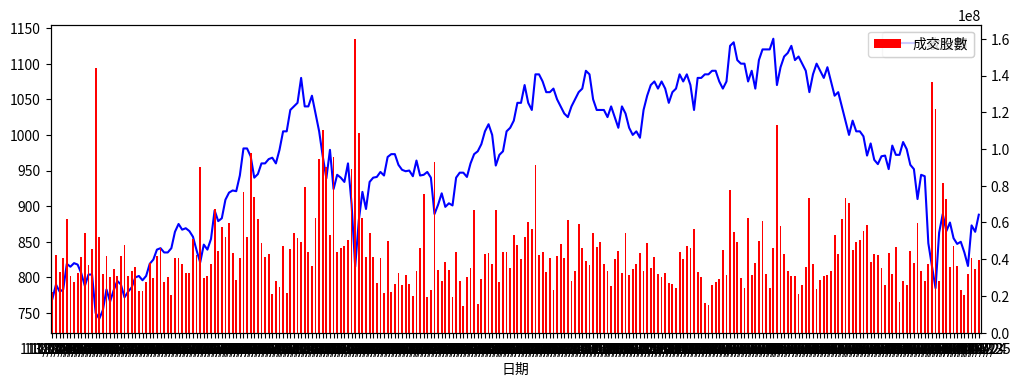

In [9]:
fig, ax1 = plt.subplots(figsize=(12, 4))

df.plot(kind='line', x='日期', y='收盤價', ax=ax1, color='blue')

ax2 = ax1.twinx()
df.plot(kind='bar', x='日期', y='成交股數', ax=ax2, color='red')

plt.show()

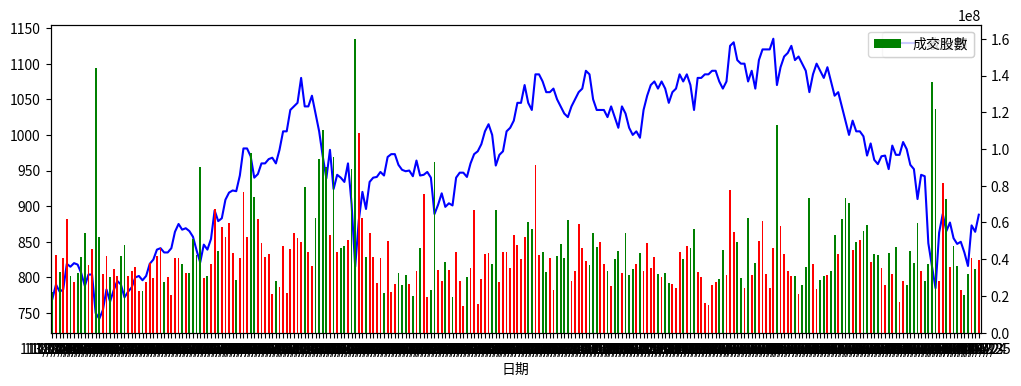

In [16]:
df['漲跌價差']= pd.to_numeric(df['漲跌價差'], errors='coerce')
df['Color'] = df['漲跌價差'].apply(lambda x: 'green' if x < 0 else 'red')
fig, ax1 = plt.subplots(figsize=(12,4))
df.plot(kind='line',x='日期', y='收盤價', ax=ax1,color='blue')
ax2 = ax1.twinx()
df.plot(kind='bar', x='日期', y='成交股數', ax=ax2, color=df['Color'])
plt.show()